# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Daniel Korkevados 315347757
2.   Ilay Damary ..

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import math as math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from matplotlib import cm
import datetime



## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [ ]:
# load the data
df = pd.read_csv('/content/customer_segmentation.csv')


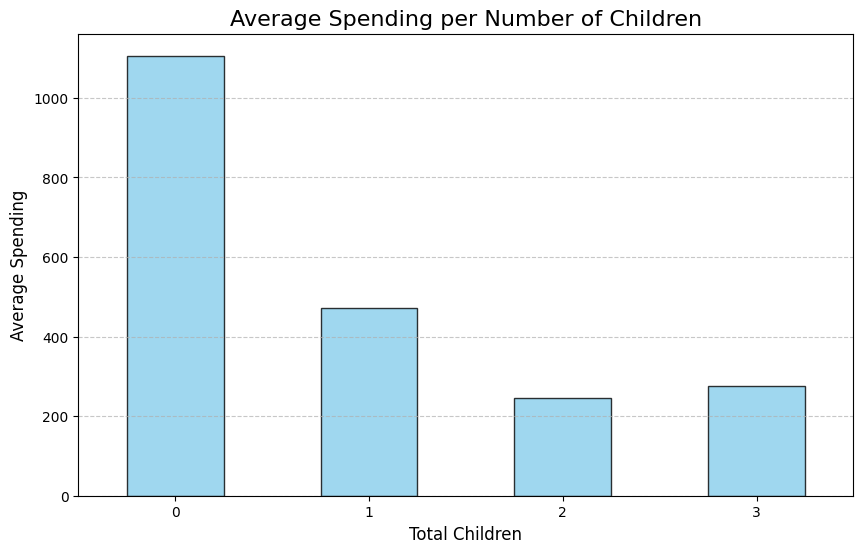

In [ ]:
# Graph 1 -
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Create a new column for total spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)

avg_spending_per_children = df.groupby('Total_Children')['Total_Spending'].mean()

plt.figure(figsize=(10, 6))
avg_spending_per_children.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Average Spending per Number of Children', fontsize=16)
plt.xlabel('Total Children', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Insight** - Families with no children spend significantly more on average than families with children, indicating higher disposable income or different spending priorities.








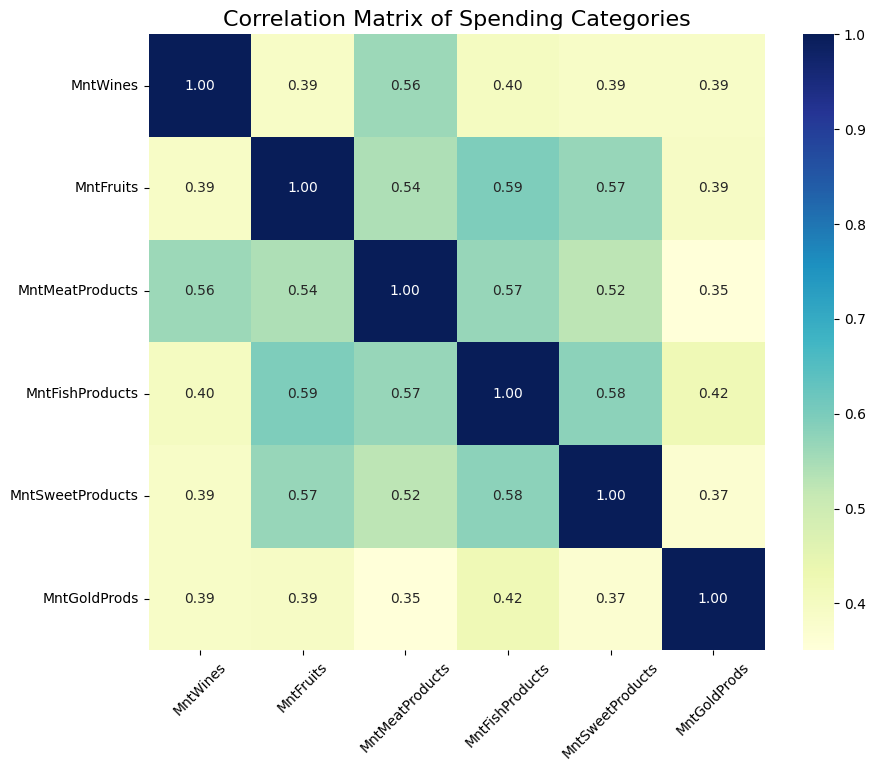

In [ ]:
# Graph 2 -
# Calculate the correlation matrix for spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
correlation_matrix = df[spending_columns].corr()

# Plot the heatmap with a clear color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True, square=True)
plt.title('Correlation Matrix of Spending Categories', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



**Insight** - Customers who spend more on meat products also tend to have higher overall spending across all categories.








<ipython-input-81-7125f8d105fc>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_online_by_age = df.groupby('Age_Group')['NumWebPurchases'].mean()
<ipython-input-81-7125f8d105fc>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_store_by_age = df.groupby('Age_Group')['NumStorePurchases'].mean()


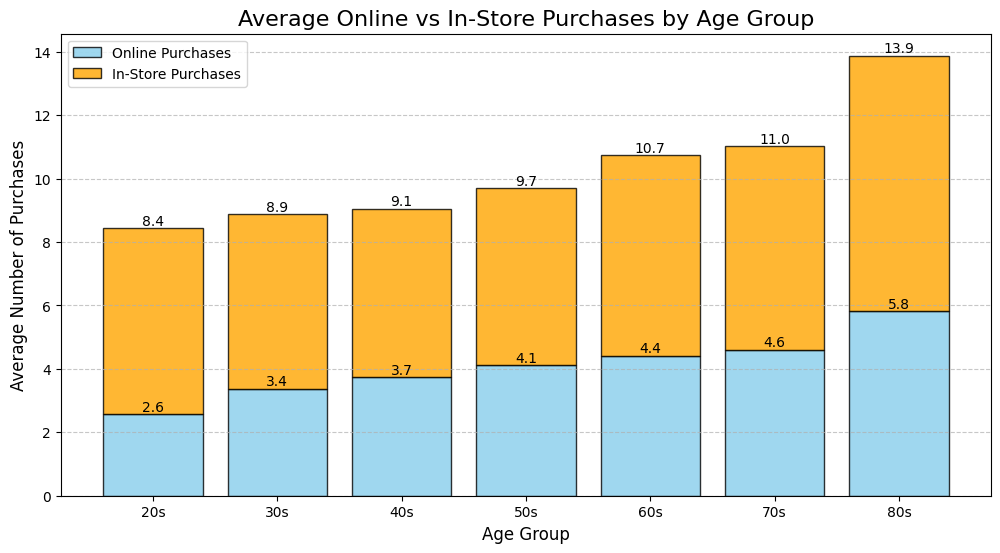

In [ ]:
# Graph 3 -
# Create a new column for age
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Create a new column for age group by decades
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 29, 39, 49, 59, 69, 79, 89],
                         labels=['20s', '30s', '40s', '50s', '60s', '70s', '80s'])

# Calculate average online and in-store purchases for each age group
avg_online_by_age = df.groupby('Age_Group')['NumWebPurchases'].mean()
avg_store_by_age = df.groupby('Age_Group')['NumStorePurchases'].mean()

# Plot online vs store purchases by age group
plt.figure(figsize=(12, 6))
bars1 = plt.bar(avg_online_by_age.index, avg_online_by_age, label='Online Purchases', color='skyblue', alpha=0.8, edgecolor='black')
bars2 = plt.bar(avg_store_by_age.index, avg_store_by_age, label='In-Store Purchases', color='orange', alpha=0.8, edgecolor='black', bottom=avg_online_by_age)

# Add text labels on the bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10, color='black')

for bar1, bar2 in zip(bars1, bars2):
    total_height = bar1.get_height() + bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, total_height, f'{total_height:.1f}', ha='center', va='bottom', fontsize=10, color='black')

# Finalize the plot
plt.title('Average Online vs In-Store Purchases by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Number of Purchases', fontsize=12)
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Insight** - Customers in their 80s make significantly more in-store purchases compared to younger age groups, while online purchases remain relatively stable across all age groups.








## 2. KMEANS (30 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).
* Note: There are some missing values. Describe how do you handle such.










In [ ]:
# load the data
df = pd.read_csv('/content/customer_segmentation.csv')


We found that it have a 24 null value which are they 1% so i decide to drop them

In [ ]:
df.isnull().sum()
df_copy = df.copy()
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
def clean_column_names(df):
    """
    Converts column names to lowercase, separates words with underscores, and removes redundant underscores.
    df: pandas.DataFrame, the DataFrame to clean column names for.
    """
    df.columns = (
        df.columns
        .str.strip()
        .str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True)  # מפריד מילים לפי אותיות גדולות
        .str.lower()  # הופך ללואר קייס
        .str.replace(r'\s+', '_', regex=True)  # מחליף רווחים בקו תחתון
        .str.replace(r'_+', '_', regex=True)  # מסיר קווים כפולים או יותר
    )


clean_column_names(df_copy)
df_copy.columns


Index(['i_d', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response'],
      dtype='object')

In [ ]:
df_copy['age'] =  2024 -  df_copy['year_birth']
df_copy['dt_customer'] = pd.to_datetime(df_copy['dt_customer'], format='%d-%m-%Y')
df_copy['days_since_register'] = (df_copy['dt_customer'] - df_copy['dt_customer'].min()).dt.days
df_copy.drop(columns=['i_d','dt_customer','year_birth'],inplace=True)
df_copy.columns


Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',
       'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods',
       'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases',
       'num_store_purchases', 'num_web_visits_month', 'accepted_cmp3',
       'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1', 'accepted_cmp2',
       'complain', 'z_cost_contact', 'z_revenue', 'response', 'age',
       'days_since_register'],
      dtype='object')

In [ ]:
columns=df_copy.columns
numeric_columns = columns.drop(['education','marital_status','days_since_register','kidhome', 'teenhome'])
categorial_columns = ['education','marital_status','days_since_register','kidhome', 'teenhome']

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
Encoder = LabelEncoder()

df_copy[numeric_columns] = scaler.fit_transform(df_copy[numeric_columns])

# Encode categorical variables
for column in categorial_columns:
    df_copy[column] = Encoder.fit_transform(df_copy[column])

df_copy.median()

,0
education,2.000000
marital_status,4.000000
income,0.074671
kidhome,0.000000
teenhome,0.000000
recency,0.494949
mnt_wines,0.116879
mnt_fruits,0.040201
mnt_meat_products,0.039420
mnt_fish_products,0.046332


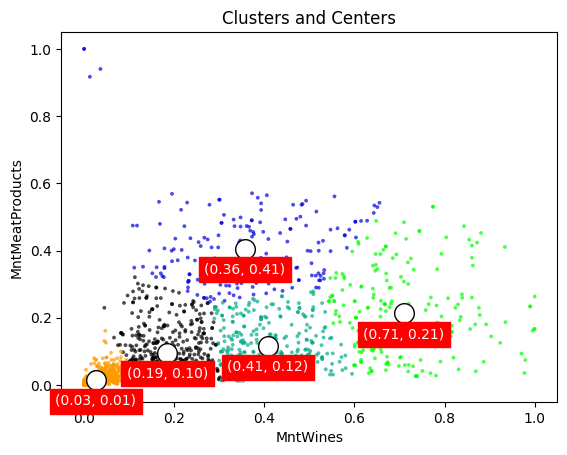

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
df_kmeans1 = df_copy[['mnt_wines', 'mnt_meat_products']]
clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(df_kmeans1)

# Visualize the clusters
colors = cm.nipy_spectral(cluster_labels.astype(float) / 5)
plt.scatter(
    df_kmeans1['mnt_wines'],
    df_kmeans1['mnt_meat_products'],
    marker=".",
    s=30,
    lw=0,
    alpha=0.7,
    c=colors,
    edgecolor="k",
)

# Labeling the clusters
centers = clusterer.cluster_centers_

# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

# Add center coordinates as text
for i, (x, y) in enumerate(centers):
    plt.text(
        x,
        y-0.075,  # Adjust to position text below the center
        f"({x:.2f}, {y:.2f})",
        fontsize=10,
        ha="center",
        color="white",
        backgroundcolor="red",
    )

# Show plot
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.title('Clusters and Centers')
plt.show()


### Elbow

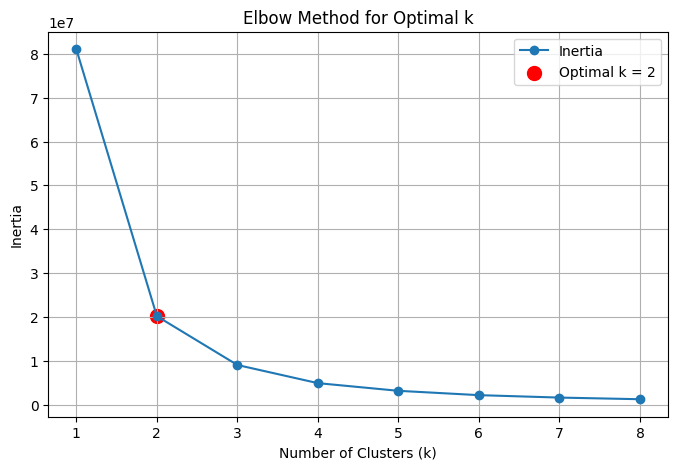

The optimal number of clusters is: 2


In [ ]:
def find_optimal_k(data, max_clusters=8):
    """
    Finds and returns the optimal k using the Elbow Method and plots the graph.
    data: DataFrame or ndarray, max_clusters: int.
    """
    # Compute inertia for k values from 1 to max_clusters
    inertia = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Calculate the distances from the line (1st to last point)
    x = np.arange(1, max_clusters + 1)
    y = np.array(inertia)
    line = np.polyfit([x[0], x[-1]], [y[0], y[-1]], 1)
    line_eq = np.poly1d(line)
    distances = np.abs(y - line_eq(x))

    # Find k with the maximum distance (elbow point)
    optimal_k = np.argmax(distances) + 1

    # Plot the elbow graph
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o',  label='Inertia')
    plt.scatter(optimal_k, y[optimal_k - 1], c='red', s=100, label=f'Optimal k = {optimal_k}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.legend()
    plt.grid(True)
    plt.show()

    return optimal_k

# Example usage:
optimal_k = find_optimal_k(df_copy, max_clusters=8)
print(f"The optimal number of clusters is: {optimal_k}")


### Silhouette Score

Best k num is = 3 and the silhouette is = 0.7287595129588282


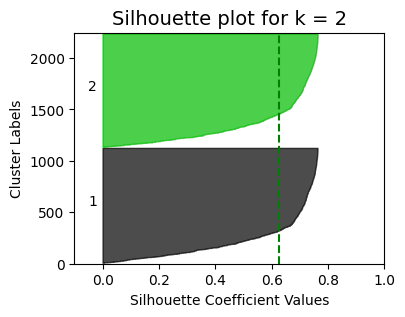

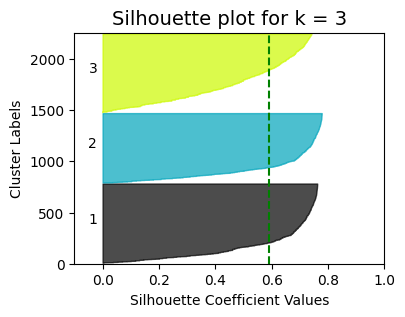

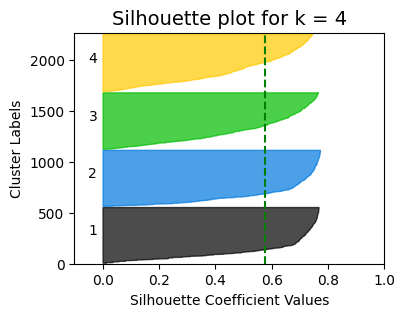

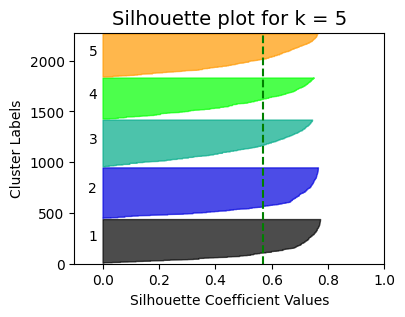

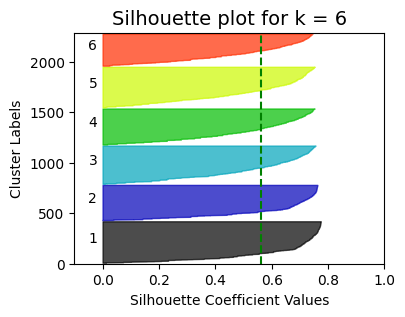

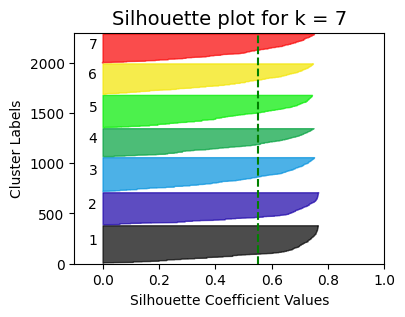

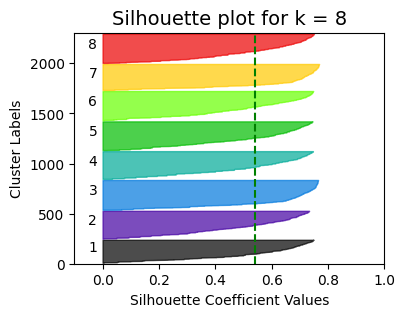

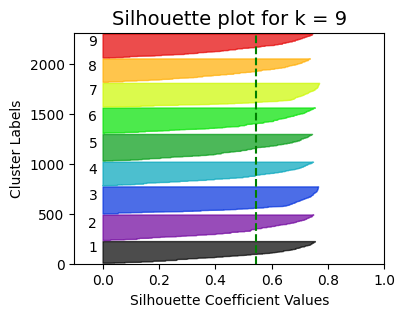

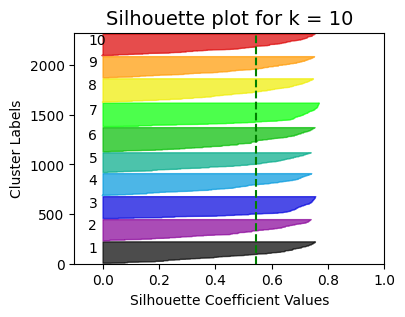

In [ ]:

max_median_silhouettes = []
graphs = []

for k in range(1, 11):
    if k == 1:
        max_median_silhouettes.append(None)
        graphs.append(None)
        continue

    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(df_copy)

    silhouette_avg = silhouette_score(df_copy, cluster_labels)

    sample_silhouette_values = silhouette_samples(df_copy, cluster_labels)

    cluster_medians = [
        np.median(sample_silhouette_values[cluster_labels == i]) for i in range(k)
    ]

    max_median_silhouettes.append(max(cluster_medians))

    fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_copy) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="green", linestyle="--")
    ax1.set_title(f"Silhouette plot for k = {k}", fontsize=14)
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Labels")

    graphs.append(fig)

best_k = None
best_silhouette = None
for i, score in enumerate(max_median_silhouettes):
    if score is not None and (best_silhouette is None or score > best_silhouette):
        best_k = i + 1
        best_silhouette = score

print(f"Best k num is = {best_k} and the silhouette is = {best_silhouette}")


database= df_copy

def Sillhouette_Graph(data):
  max_median_silhouettes = []

  for k in range(1, 11):
      if k == 1:
          max_median_silhouettes.append(None)
          continue

      kmeans = KMeans(n_clusters=k, random_state=42)
      cluster_labels = kmeans.fit_predict(data)

      silhouette_avg = silhouette_score(df_copy, cluster_labels)

      sample_silhouette_values = silhouette_samples(data, cluster_labels)

      cluster_medians = [
          np.median(sample_silhouette_values[cluster_labels == i]) for i in range(k)
      ]

      max_median_silhouettes.append(max(cluster_medians))

  # Plotting the median silhouette scores for each k
  k_values = range(2, 11)  # We skip k=1 as it's not used in the calculation
  plt.figure(figsize=(6, 4))
  plt.plot(k_values, max_median_silhouettes[1:], marker='o', linestyle='-', color='b')
  plt.title("Max Median Silhouette Scores vs. Number of Clusters (k)")
  plt.xlabel("Number of Clusters (k)")
  plt.ylabel("Max Median Silhouette Score")
  plt.grid(True)
  plt.show()

  # Now find the best k
  best_k = None
  best_silhouette = None
  for i, score in enumerate(max_median_silhouettes):
      if score is not None and (best_silhouette is None or score > best_silhouette):
          best_k = i + 1
          best_silhouette = score

  print(f"Best k num is = {best_k} and the silhouette is = {best_silhouette}")

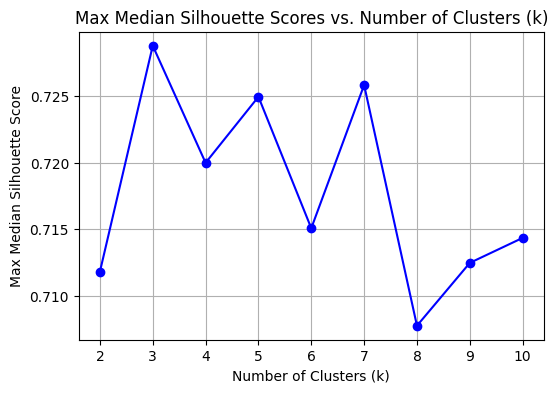

Best k num is = 3 and the silhouette is = 0.7287595129588282


In [ ]:
Sillhouette_Graph(database)

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





[[-292.07959346   -0.29923794]
 [ 226.92111692   -0.42240779]
 [  40.92074165   -0.33118571]
 ...
 [ 186.92084484   -0.55059791]
 [ 185.92095956    0.70528231]
 [-255.07857026    1.64529206]]
Explained variance by each component: [9.99895373e-01 3.48366194e-05]
Total explained variance: 0.9999302098228265


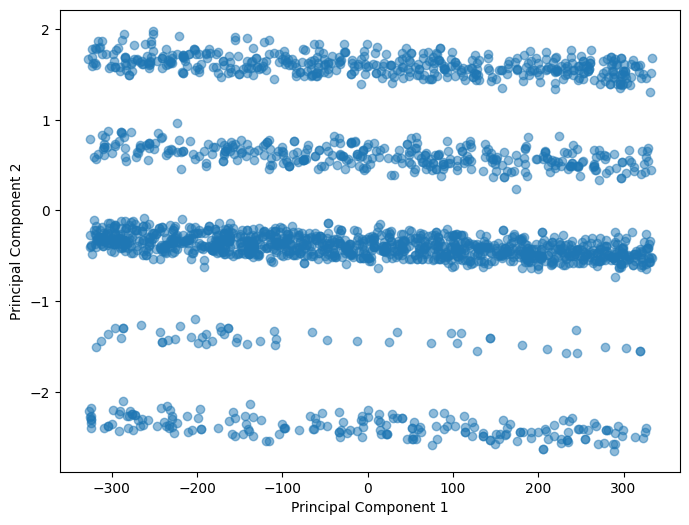

In [ ]:
# Adjust n_components as needed
pca = PCA(n_components=2)
pca.fit(df_copy)

projected = pca.fit_transform(df_copy)
#print(X)
print(projected)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(projected, columns=[f'PC{i+1}' for i in range(pca.n_components_)])


# Plotting the PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display explained variance
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Explained variance by each component: {explained_variance}")
print(f"Total explained variance: {total_explained_variance}")


**Q**: What is the variance explained in the 2 component PCA?

**A**:

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





Best k: 2 with a silhouette score of 0.6279235373082859


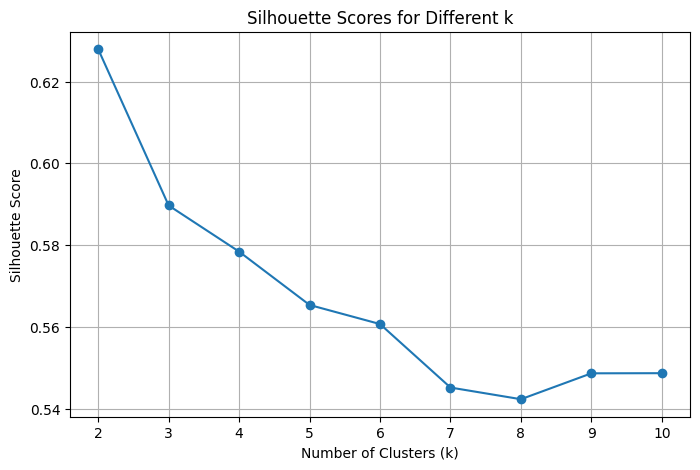

In [ ]:
from sklearn.metrics import silhouette_samples

# Find the optimal k using silhouette score
max_silhouette = -1
best_k = None
silhouette_scores = []

for k in range(2, 11):  # Test k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > max_silhouette:
        max_silhouette = silhouette_avg
        best_k = k

print(f"Best k: {best_k} with a silhouette score of {max_silhouette}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### Elbow

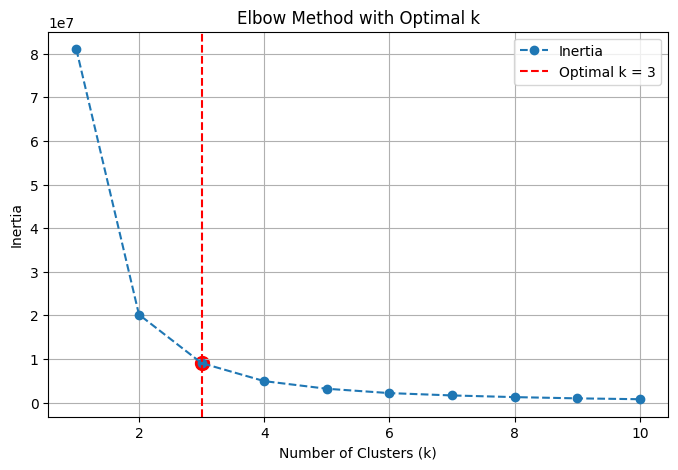

Optimal k based on the Elbow Method: 3


In [ ]:
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Find the optimal k using the "maximum distance from the line" method
x = np.array(k_values)
y = np.array(inertia)

# Fit a straight line between the first and last point
line = np.polyfit([x[0], x[-1]], [y[0], y[-1]], 1)
line_eq = np.poly1d(line)

# Calculate distances from the line for each point
distances = np.abs(y - line_eq(x))
optimal_k = x[np.argmax(distances)]

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(optimal_k, y[np.argmax(distances)], color='red', s=100)  # Mark the optimal k
plt.title('Elbow Method with Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal k based on the Elbow Method: {optimal_k}")


### Silhouette

Best k num is = 3 and the silhouette is = 0.7279752948839462


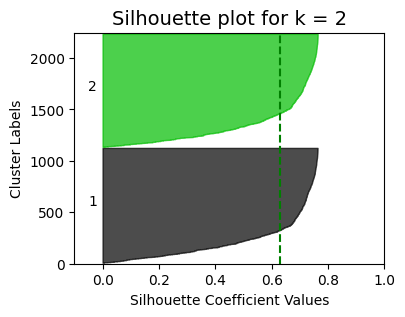

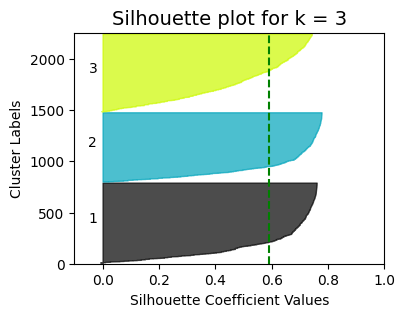

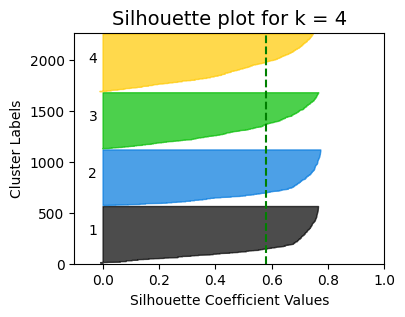

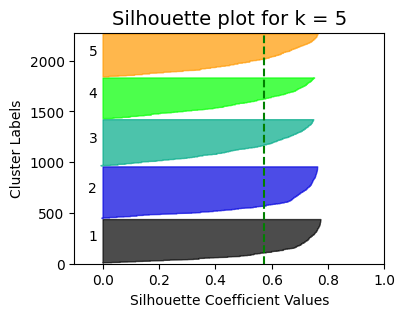

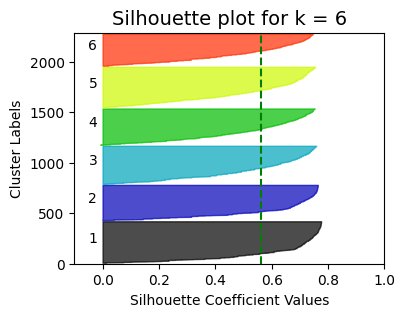

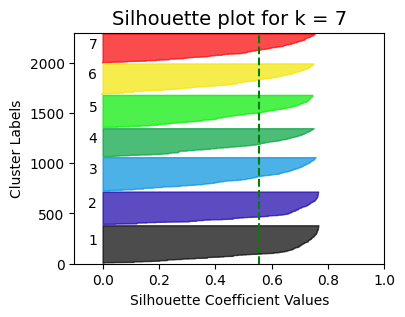

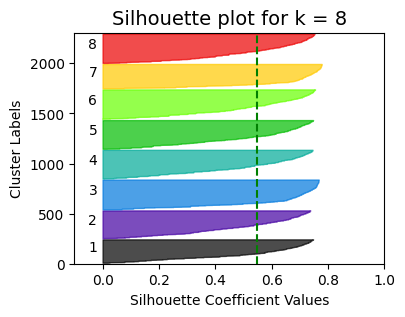

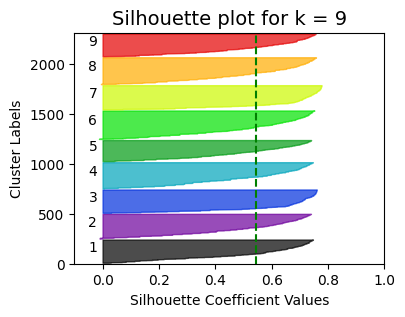

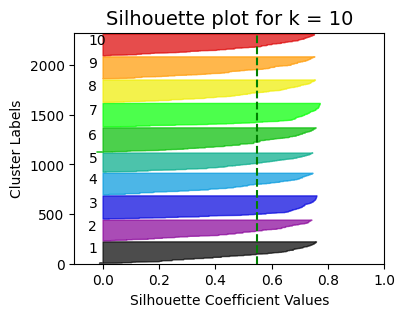

In [ ]:

max_median_silhouettes = []
graphs = []

for k in range(1, 11):
    if k == 1:
        max_median_silhouettes.append(None)
        graphs.append(None)
        continue

    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, cluster_labels)

    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    cluster_medians = [
        np.median(sample_silhouette_values[cluster_labels == i]) for i in range(k)
    ]

    max_median_silhouettes.append(max(cluster_medians))

    fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_pca) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="green", linestyle="--")
    ax1.set_title(f"Silhouette plot for k = {k}", fontsize=14)
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Labels")

    graphs.append(fig)

best_k = None
best_silhouette = None
for i, score in enumerate(max_median_silhouettes):
    if score is not None and (best_silhouette is None or score > best_silhouette):
        best_k = i + 1
        best_silhouette = score

print(f"Best k num is = {best_k} and the silhouette is = {best_silhouette}")


## we dont find the first version very appealing to the eye but we wanted to make it just like in the lab, we can have instead a graph of median results
# so  we made another version as a function and aftwewards we will use it
database= df_pca

def Sillhouette_Graph(data):
  max_median_silhouettes = []

  for k in range(1, 11):
      if k == 1:
          max_median_silhouettes.append(None)
          continue

      kmeans = KMeans(n_clusters=k, random_state=42)
      cluster_labels = kmeans.fit_predict(data)

      silhouette_avg = silhouette_score(df_copy, cluster_labels)

      sample_silhouette_values = silhouette_samples(data, cluster_labels)

      cluster_medians = [
          np.median(sample_silhouette_values[cluster_labels == i]) for i in range(k)
      ]

      max_median_silhouettes.append(max(cluster_medians))

  # Plotting the median silhouette scores for each k
  k_values = range(2, 11)  # We skip k=1 as it's not used in the calculation
  plt.figure(figsize=(6, 4))
  plt.plot(k_values, max_median_silhouettes[1:], marker='o', linestyle='-', color='b')
  plt.title("Max Median Silhouette Scores vs. Number of Clusters (k)")
  plt.xlabel("Number of Clusters (k)")
  plt.ylabel("Max Median Silhouette Score")
  plt.grid(True)
  plt.show()

  # Now find the best k
  best_k = None
  best_silhouette = None
  for i, score in enumerate(max_median_silhouettes):
      if score is not None and (best_silhouette is None or score > best_silhouette):
          best_k = i + 1
          best_silhouette = score

  print(f"Best k num is = {best_k} and the silhouette is = {best_silhouette}")

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**: In principle, everything depends on which algorithm we choose to use. We saw in the lecture that there are classification algorithms that are suitable for different cases. In this case, if we use, for example, spectral clustering, then in my opinion it will correctly classify all 5 categories.

But here because we used kmeans and siloute which calculates distance and on this basis determines groups we got these groups.

## 5. K-means Clustering Exercise (10 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (7 points).











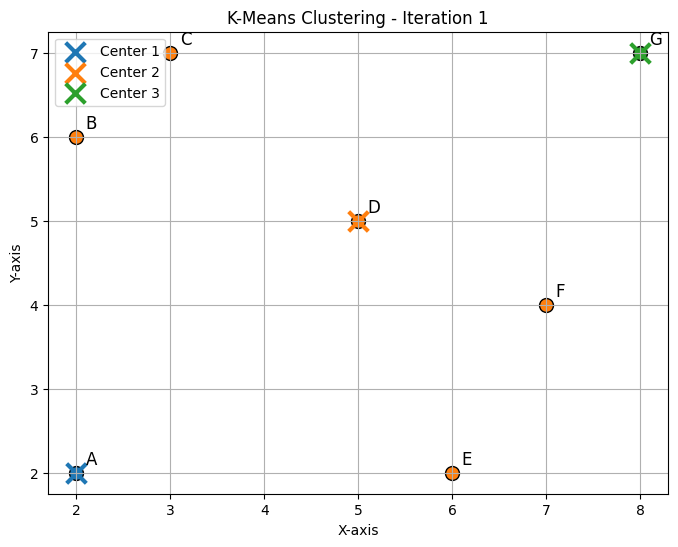

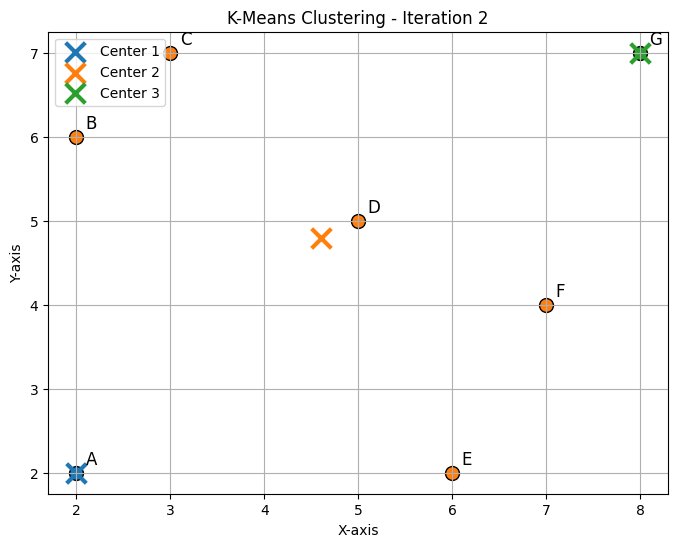

In [ ]:
# Step 1: Define the points
points = {
    "A": [2, 2],
    "B": [2, 6],
    "C": [3, 7],
    "D": [5, 5],
    "E": [6, 2],
    "F": [7, 4],
    "G": [8, 7]
}

# Convert to NumPy array
data = np.array(list(points.values()))
point_labels = list(points.keys())

# Step 2: Choose initial cluster centers manually (e.g., A, D, G)
initial_centers = np.array([points["A"], points["D"], points["G"]])

def assign_clusters(data, centers):
    """
    Assign points to the nearest cluster based on Euclidean distance.
    """
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centers, axis=1)
        clusters.append(np.argmin(distances))  # Assign to the closest center
    return np.array(clusters)

def plot_clusters(data, centers, clusters, iteration, point_labels):
    """
    Plot the clusters and their current centers.
    """
    plt.figure(figsize=(8, 6))
    colors = ['C0', 'C1', 'C2']

    # Plot each point with its cluster color
    for i, point in enumerate(data):
        plt.scatter(point[0], point[1], color=colors[clusters[i]], s=100, edgecolor='k')
        plt.text(point[0] + 0.1, point[1] + 0.1, point_labels[i], fontsize=12)

    # Plot the cluster centers
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], color=colors[i], marker='x', s=200, linewidths=3, label=f'Center {i+1}')

    plt.title(f"K-Means Clustering - Iteration {iteration}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 3: First iteration
clusters = assign_clusters(data, initial_centers)
plot_clusters(data, initial_centers, clusters, iteration=1, point_labels=point_labels)

# Step 4: Update cluster centers
def update_centers(data, clusters, n_clusters):
    """
    Update the cluster centers as the mean of all points in each cluster.
    """
    new_centers = []
    for i in range(n_clusters):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centers.append(cluster_points.mean(axis=0))
        else:
            new_centers.append(initial_centers[i])  # Keep the original center if cluster is empty
    return np.array(new_centers)

new_centers = update_centers(data, clusters, n_clusters=3)
plot_clusters(data, new_centers, clusters, iteration=2, point_labels=point_labels)


**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?








1.   The points grouped into clusters by finding the closest center to each   point. Each cluster contains points that are more similar to each other based on distance from the center. This process ensures that points in the same cluster are as close as possible to their center and far from other cluster centers.


2.   Yes, starting with different initial centers can lead to different final clusters because the algorithm depends on where it begins. If the starting points are far apart, the clusters might form differently than when they are close together. This happens because K-Means minimizes the distances locally, which can trap it in a local solution instead of the best overall grouping.

3. K-means is useful for customer segmentation, grouping people who buy similar products into categories. It's also used in organizing images by finding similar colors or patterns to simplify data. Additionally, it can help in biology, like grouping animals by similar characteristics, or in cities to find areas with similar traffic patterns



**Answers**:



## 6. Principal Component Analysis (PCA) (10 points)
You are given a dataset with 5 rows and 5 columns as shown below. Perform Principal Component Analysis (PCA) on this dataset.

$\begin{pmatrix}
2 & 0 & 1 & 3 & 4\\
1 & 1 & 0 & 2 & 1\\
3 & 2 & 1 & 0 & 5\\
4 & 3 & 2 & 1 & 2\\
5 & 1 & 3 & 4 & 0\\
\end{pmatrix}$

**Tasks:**
1.   **Code**: Compute the eigenvectors using the PCA package from sklearn. (3 points).
2.   **On paper**: Project the dataset onto (1) A 1-dimensional space (first principal component). (2) A 2-dimensional space (first and second principal components). (7 points).

In [ ]:
from sklearn.decomposition import PCA
data = [[2,0,1,3,4],[1,1,0,2,1],[3,2,1,0,5],[4,3,2,1,2],[5,1,3,4,0]]
data_norm = (data - np.mean(data)) / np.std(data)
cov_mat = data_norm.T.dot(data_norm)
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print(eig_values)
print(eig_vectors)
combined = [[(eig_values[i],eig_vectors[:,i])] for i in range(len(eig_values))]
combined.sort(key=lambda x: x[0], reverse=True)
combined

[11.53012309  0.0272431   2.00249984  6.30660087  5.13353309]
[[ 0.3313745  -0.0831866  -0.24973795 -0.82900775  0.36557903]
 [-0.02937468 -0.63267041  0.03756078 -0.27767676 -0.72135296]
 [ 0.33485268  0.46142765  0.72797449 -0.25605304 -0.28186555]
 [ 0.47779896 -0.58852467  0.41521412  0.30223316  0.40199405]
 [-0.74088454 -0.18311574  0.48360161 -0.2805953   0.32396679]]


[[(11.530123094422127,
   array([ 0.3313745 , -0.02937468,  0.33485268,  0.47779896, -0.74088454]))],
 [(6.306600873476376,
   array([-0.82900775, -0.27767676, -0.25605304,  0.30223316, -0.2805953 ]))],
 [(5.133533094863693,
   array([ 0.36557903, -0.72135296, -0.28186555,  0.40199405,  0.32396679]))],
 [(2.0024998383637147,
   array([-0.24973795,  0.03756078,  0.72797449,  0.41521412,  0.48360161]))],
 [(0.02724309887409513,
   array([-0.0831866 , -0.63267041,  0.46142765, -0.58852467, -0.18311574]))]]

In [ ]:
# Compute the eigenvectors using the PCA package from sklearn.
from sklearn.decomposition import PCA
data = [[2,0,1,3,4],[1,1,0,2,1],[3,2,1,0,5],[4,3,2,1,2],[5,1,3,4,0]]
data_norm = (data - np.mean(data)) / np.std(data)
# cov_mat = data_norm.T.dot(data_norm)

pca = PCA(n_components=2)
pca.fit(data_norm)

print(f"pca.components :")
print(pca.components_)

print(f"The 1ST - eig_vec are : {pca.components_[0]}")
# print(f"The 2ST - eig_vec are : {pca.components_[1]}")
# print(f"The eig_val are : {eig_val}")


pca.components :
[[-0.36816003  0.05031372 -0.32020271 -0.47984702  0.7274227 ]
 [ 0.64138932  0.50697837  0.36436685 -0.40743821  0.18117277]]
The 1ST - eig_vec are : [-0.36816003  0.05031372 -0.32020271 -0.47984702  0.7274227 ]


In [ ]:
end = pca.fit_transform(data)
print(end)


[[ 1.10983121 -1.61446755]
 [ 0.14608658 -2.24932547]
 [ 3.00926237  1.44436591]
 [-0.29090177  2.00614392]
 [-3.9742784   0.41328318]]
